In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import scipy.stats as stats
from math import log10

imagesFolder = "../images/"
colorMap = {"idade": "Purple", "peso": "Red", "cargaFinal": "Green", "vo2Max": "Blue"}

data = pd.read_csv("../data/dadosMedicos.csv", sep = " ")
data

,idade,peso,cargaFinal,vo2Max
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405
...,...,...,...,...
1167,65,117.8,117.0,18.930390
1168,65,122.6,80.0,11.174551
1169,35,160.0,140.0,21.125000
1170,43,144.0,170.0,23.819444


In [2]:
data_medias = data.mean(axis = 'index')
data_medias

idade          53.290956
peso           85.925776
cargaFinal    172.271502
vo2Max         29.394728
dtype: float64

In [3]:
data_var = data.var(axis = 'index')
data_var

idade          217.453274
peso           219.013757
cargaFinal    4913.045985
vo2Max         110.192255
dtype: float64

In [4]:
data_moda = data.mode(axis = 'index')
data_moda

,idade,peso,cargaFinal,vo2Max
0,59.0,72.5,250.0,14.285714
1,NaN,81.5,NaN,NaN


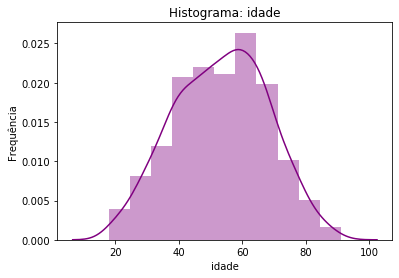

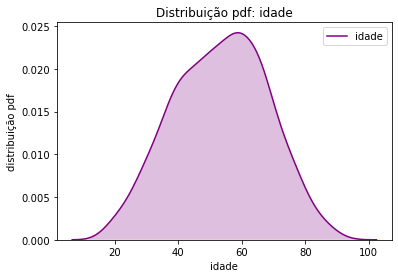

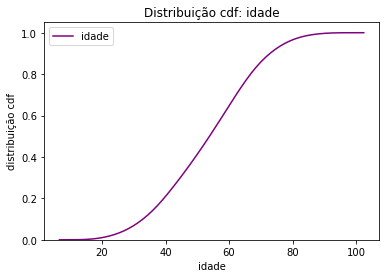

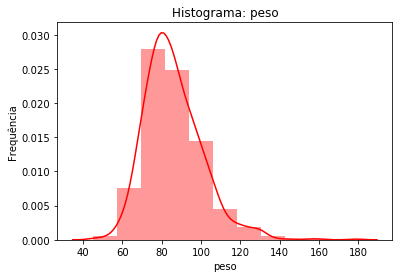

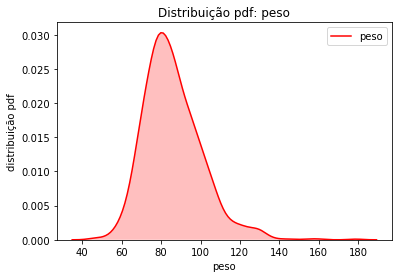

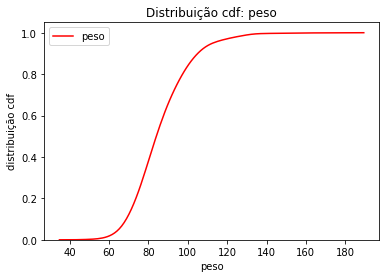

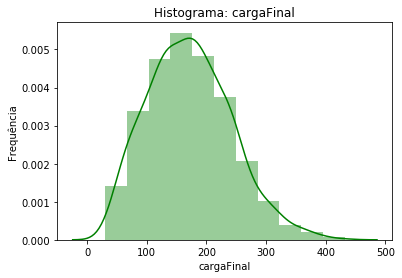

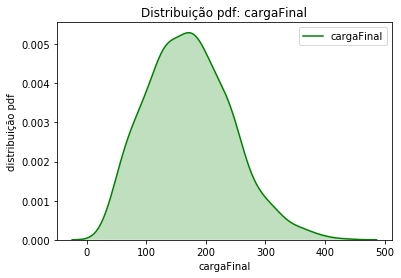

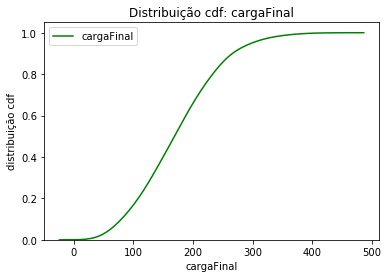

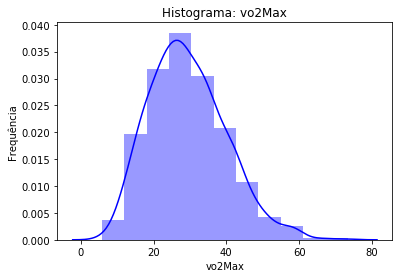

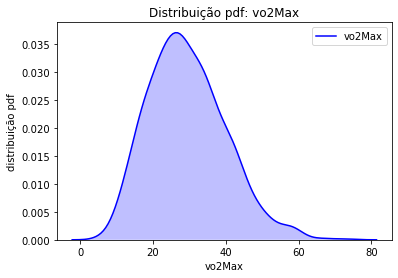

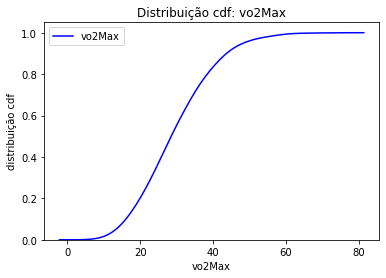

In [5]:
for var in colorMap:
    useBins = int(1+ 3.3 * log10(data.count()[var]))
    
    sns.distplot(data[var],bins = useBins ,color = colorMap[var])
    plt.title("Histograma: " + var)
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.savefig(imagesFolder + var + "_hist")
    plt.show()
                
    sns.kdeplot(data[var], color = colorMap[var], shade = True)
    plt.title("Distribuição pdf: " + var)
    plt.xlabel(var)
    plt.ylabel("distribuição pdf")
    plt.savefig(imagesFolder + var + "_pdf_dist")
    plt.show()
    
    sns.kdeplot(data[var], color = colorMap[var], cumulative = True)
    plt.title("Distribuição cdf: " + var)
    plt.xlabel(var)
    plt.ylabel("distribuição cdf")
    plt.savefig(imagesFolder + var + "_cdf_dist")
    plt.show()

Variável:			idade
Média:			 53.29095563139932
Desvio Padrão:		 14.746296966880656
Variância:		 217.45327423543367


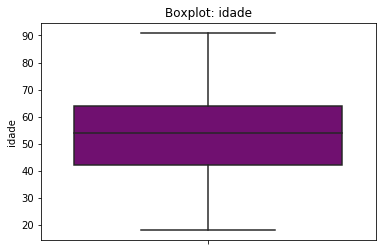

Variável:			peso
Média:			 85.92577645051195
Desvio Padrão:		 14.799113384059629
Variância:		 219.0137569542528


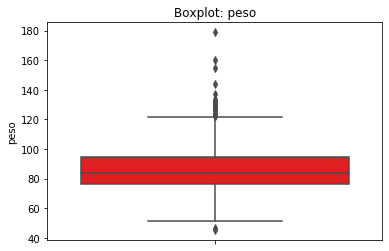

Variável:			cargaFinal
Média:			 172.27150170648466
Desvio Padrão:		 70.093123662472
Variância:		 4913.0459847625925


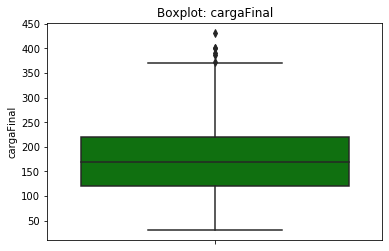

Variável:			vo2Max
Média:			 29.39472792315316
Desvio Padrão:		 10.49724989342601
Variância:		 110.1922553250324


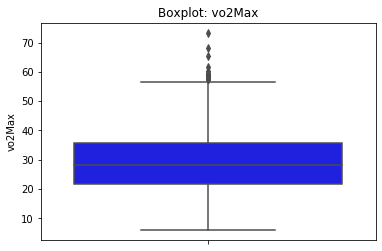

In [6]:
for var in colorMap:
    print("Variável:\t\t\t" + var)
    print("Média:\t\t\t", data[var].mean())
    print("Desvio Padrão:\t\t", data[var].std())
    print("Variância:\t\t", data[var].var())
    
    sns.boxplot(data = data, color = colorMap[var], y = var)
    plt.title("Boxplot: " + var)
    plt.savefig(imagesFolder + var + "_boxplot")
    plt.show()
    
    

idade

Lambda da Exponencial		 0.018764910258257682 

Mu da Gaussiana:		 53.29095563139932
Sigma^2 da Gaussiana:		 217.45327423543367 

Mu da Lognormal:		 3.932509819486875
Sigma^2 da Lognormal:		 0.0936331955793438 

Constante da Weibull:		 4.089481828645864
loc da Weibull:			 0
Scale da Weibull:		 58.78289005707875 



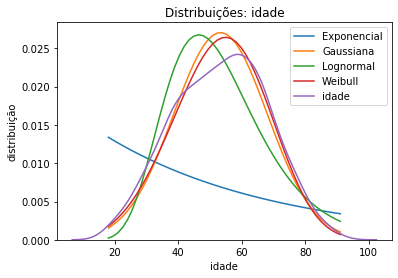

peso

Lambda da Exponencial		 0.011637951279683105 

Mu da Gaussiana:		 85.92577645051195
Sigma^2 da Gaussiana:		 219.0137569542528 

Mu da Lognormal:		 4.439451920143028
Sigma^2 da Lognormal:		 0.027586997105752877 

Constante da Weibull:		 5.408013188534343
loc da Weibull:			 0
Scale da Weibull:		 92.24080850317551 



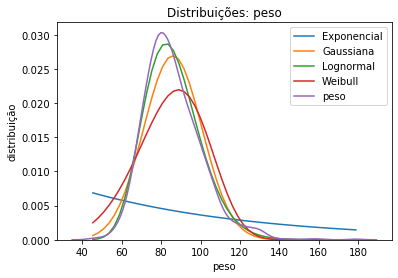

cargaFinal

Lambda da Exponencial		 0.005804790636258545 

Mu da Gaussiana:		 172.27150170648466
Sigma^2 da Gaussiana:		 4913.0459847625925 

Mu da Lognormal:		 5.0546544058509895
Sigma^2 da Lognormal:		 0.2103368574854832 

Constante da Weibull:		 2.6469810001574725
loc da Weibull:			 0
Scale da Weibull:		 194.0388415799269 



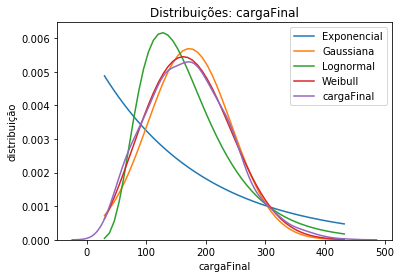

vo2Max

Lambda da Exponencial		 0.03401970593551017 

Mu da Gaussiana:		 29.39472792315316
Sigma^2 da Gaussiana:		 110.1922553250324 

Mu da Lognormal:		 3.3132400746591215
Sigma^2 da Lognormal:		 0.14364411960908474 

Constante da Weibull:		 2.9978221690896216
loc da Weibull:			 0
Scale da Weibull:		 32.9274599599628 



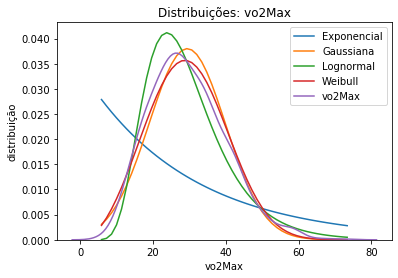

In [7]:
for var in colorMap:
    interval = np.linspace(data[var].min(), data[var].max())
    
    print(var + "\n")
        
    exp_lamda = 1/data[var].mean()
    exp = exp_lamda * np.exp(-(exp_lamda * interval))
    plt.plot(interval, exp, label = "Exponencial")
    print("Lambda da Exponencial\t\t", exp_lamda, "\n")
    
    gauss_mu = data[var].mean()
    gauss_sigma2 = data[var].var()
    gauss = (1/(np.sqrt(2 * np.pi * gauss_sigma2))) * np.exp((-1/2) * ((interval - gauss_mu) ** 2)/ gauss_sigma2)
    plt.plot(interval, gauss, label = "Gaussiana")
    print("Mu da Gaussiana:\t\t", gauss_mu)
    print("Sigma^2 da Gaussiana:\t\t", gauss_sigma2, "\n")
    
    ln_mu = np.sum(np.log(data[var]))/data[var].count()
    ln_sigma2 = np.sum((np.log(data[var]) - ln_mu)**2)/data[var].count()
    ln = (1/(np.sqrt(2 * np.pi * ln_sigma2) * interval)) * np.exp((-1/2)*((np.log(interval) - ln_mu)**2)/ln_sigma2)
    #ln = (1/(np.sqrt(2 * np.pi * ln_sigma2) * interval)) * np.exp((-1/2)*((np.log(intervalo)-lognormal_mu)**2)/lognormal_sigma2)
    plt.plot(interval, ln, label = "Lognormal")
    print("Mu da Lognormal:\t\t", ln_mu)
    print("Sigma^2 da Lognormal:\t\t", ln_sigma2, "\n")
    
    wb_params = stats.weibull_min.fit(data[var], floc = 0)
    wb = stats.weibull_min.pdf(interval, wb_params[0], loc = wb_params[1], scale = wb_params[2])
    plt.plot(interval, wb, label = "Weibull")
    print("Constante da Weibull:\t\t", wb_params[0])
    print("loc da Weibull:\t\t\t", wb_params[1])
    print("Scale da Weibull:\t\t", wb_params[2], "\n")
    
    
    sns.kdeplot(data[var])
    plt.title("Distribuições: " + var)
    plt.xlabel(var)
    plt.ylabel("distribuição")
    plt.savefig(imagesFolder + var + "_dists")
    plt.show()

[ 5.84684685  7.22412208  8.60139732  9.97867255 11.35594778 12.73322302
 14.11049825 15.48777349 16.86504872 18.24232396 19.61959919 20.99687443
 22.37414966 23.75142489 25.12870013 26.50597536 27.8832506  29.26052583
 30.63780107 32.0150763  33.39235154 34.76962677 36.146902   37.52417724
 38.90145247 40.27872771 41.65600294 43.03327818 44.41055341 45.78782864
 47.16510388 48.54237911 49.91965435 51.29692958 52.67420482 54.05148005
 55.42875529 56.80603052 58.18330575 59.56058099 60.93785622 62.31513146
 63.69240669 65.06968193 66.44695716 67.8242324  69.20150763 70.57878286
 71.9560581  73.33333333]
idade 

Lambda da exponencial:  0.018764910258257682 

Mu da gaussiana:  53.29095563139932
Sigma ao quadrado da gaussiana:  217.45327423543367 

Mu da lognormal:  3.932509819486875
Sigma ao quadrado da lognormal:  0.0936331955793438 

Constante da Weibull:  4.089481828645864
loc da Weibull:  0
Scale da Weibull:  58.78289005707875 



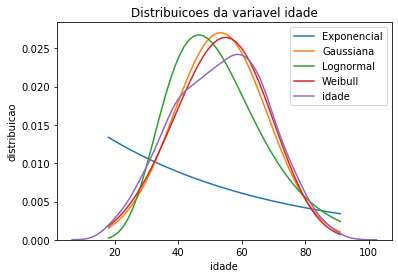




[ 5.84684685  7.22412208  8.60139732  9.97867255 11.35594778 12.73322302
 14.11049825 15.48777349 16.86504872 18.24232396 19.61959919 20.99687443
 22.37414966 23.75142489 25.12870013 26.50597536 27.8832506  29.26052583
 30.63780107 32.0150763  33.39235154 34.76962677 36.146902   37.52417724
 38.90145247 40.27872771 41.65600294 43.03327818 44.41055341 45.78782864
 47.16510388 48.54237911 49.91965435 51.29692958 52.67420482 54.05148005
 55.42875529 56.80603052 58.18330575 59.56058099 60.93785622 62.31513146
 63.69240669 65.06968193 66.44695716 67.8242324  69.20150763 70.57878286
 71.9560581  73.33333333]
peso 

Lambda da exponencial:  0.011637951279683105 

Mu da gaussiana:  85.92577645051195
Sigma ao quadrado da gaussiana:  219.0137569542528 

Mu da lognormal:  4.439451920143028
Sigma ao quadrado da lognormal:  0.027586997105752877 

Constante da Weibull:  5.408013188534343
loc da Weibull:  0
Scale da Weibull:  92.24080850317551 



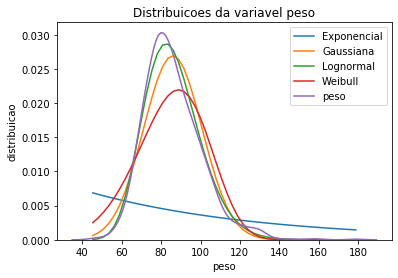




[ 5.84684685  7.22412208  8.60139732  9.97867255 11.35594778 12.73322302
 14.11049825 15.48777349 16.86504872 18.24232396 19.61959919 20.99687443
 22.37414966 23.75142489 25.12870013 26.50597536 27.8832506  29.26052583
 30.63780107 32.0150763  33.39235154 34.76962677 36.146902   37.52417724
 38.90145247 40.27872771 41.65600294 43.03327818 44.41055341 45.78782864
 47.16510388 48.54237911 49.91965435 51.29692958 52.67420482 54.05148005
 55.42875529 56.80603052 58.18330575 59.56058099 60.93785622 62.31513146
 63.69240669 65.06968193 66.44695716 67.8242324  69.20150763 70.57878286
 71.9560581  73.33333333]
cargaFinal 

Lambda da exponencial:  0.005804790636258545 

Mu da gaussiana:  172.27150170648466
Sigma ao quadrado da gaussiana:  4913.0459847625925 

Mu da lognormal:  5.0546544058509895
Sigma ao quadrado da lognormal:  0.2103368574854832 

Constante da Weibull:  2.6469810001574725
loc da Weibull:  0
Scale da Weibull:  194.0388415799269 



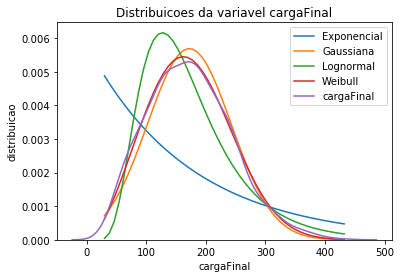




[ 5.84684685  7.22412208  8.60139732  9.97867255 11.35594778 12.73322302
 14.11049825 15.48777349 16.86504872 18.24232396 19.61959919 20.99687443
 22.37414966 23.75142489 25.12870013 26.50597536 27.8832506  29.26052583
 30.63780107 32.0150763  33.39235154 34.76962677 36.146902   37.52417724
 38.90145247 40.27872771 41.65600294 43.03327818 44.41055341 45.78782864
 47.16510388 48.54237911 49.91965435 51.29692958 52.67420482 54.05148005
 55.42875529 56.80603052 58.18330575 59.56058099 60.93785622 62.31513146
 63.69240669 65.06968193 66.44695716 67.8242324  69.20150763 70.57878286
 71.9560581  73.33333333]
vo2Max 

Lambda da exponencial:  0.03401970593551017 

Mu da gaussiana:  29.39472792315316
Sigma ao quadrado da gaussiana:  110.1922553250324 

Mu da lognormal:  3.3132400746591215
Sigma ao quadrado da lognormal:  0.14364411960908474 

Constante da Weibull:  2.9978221690896216
loc da Weibull:  0
Scale da Weibull:  32.9274599599628 



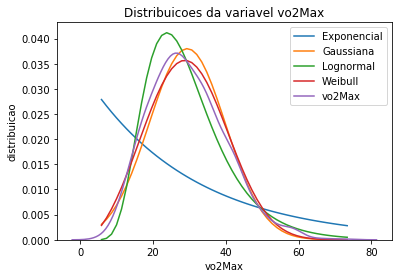

In [8]:


for i in range(0,4):
    Data = data
    x= Data.columns[i]
    intervalo = np.linspace(Data[x].min(),Data[x].max())
    print(interval)
    print(x, "\n")
    
    #Exponencial
    exponencial_lambda = 1/Data[x].mean()
    exponencial= exponencial_lambda* np.exp(-(exponencial_lambda*intervalo))
    plt.plot(intervalo,exponencial, label ="Exponencial")
    print("Lambda da exponencial: ", exponencial_lambda, "\n")

    
    #gaussiana
    gaussiana_mu= Data[x].mean()
    gaussiana_sigma2=Data[x].var()
    gaussiana =(1/(np.sqrt(2*np.pi*gaussiana_sigma2)))* np.exp((-1/2)*((intervalo-gaussiana_mu)**2)/gaussiana_sigma2)
    plt.plot(intervalo, gaussiana, label="Gaussiana")
    print("Mu da gaussiana: ", gaussiana_mu)
    print("Sigma ao quadrado da gaussiana: ", gaussiana_sigma2, "\n")
    
    #lognormal

    lognormal_mu= np.sum(np.log(Data[x]))/Data[x].count()
    lognormal_sigma2= np.sum((np.log(Data[x])-lognormal_mu)**2)/Data[x].count()
    lognormal= (1/(np.sqrt(2*np.pi*lognormal_sigma2)*intervalo))* np.exp((-1/2)*((np.log(intervalo)-lognormal_mu)**2)/lognormal_sigma2)
    plt.plot(intervalo, lognormal, label="Lognormal")
    print("Mu da lognormal: ", lognormal_mu)
    print("Sigma ao quadrado da lognormal: ", lognormal_sigma2, "\n")
                             
    #weibull
    weibull_params = stats.weibull_min.fit(Data[x],floc=0)
    weibull = stats.weibull_min.pdf(intervalo, weibull_params[0],loc=weibull_params[1], scale=weibull_params[2])
    plt.plot(intervalo, weibull, label="Weibull")
    print("Constante da Weibull: ",weibull_params[0])
    print("loc da Weibull: ", weibull_params[1])
    print("Scale da Weibull: ",weibull_params[2],"\n")
    
    
    #empirica
    sns.kdeplot(Data[x])
    
    
    plt.title('Distribuicoes da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicoes da variavel '+x)
    plt.show()
    print("\n\n")

idade 



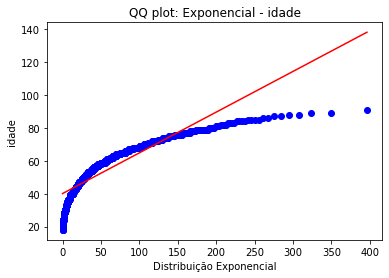

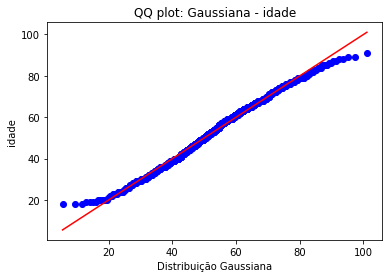

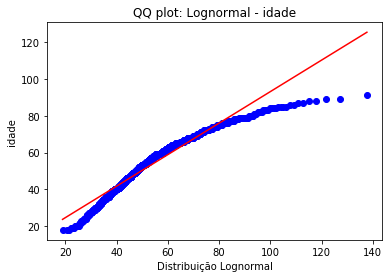

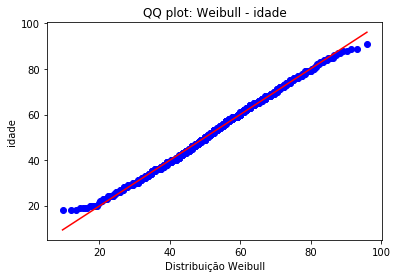

peso 



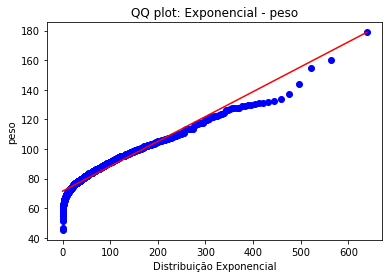

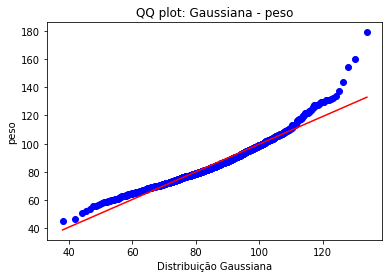

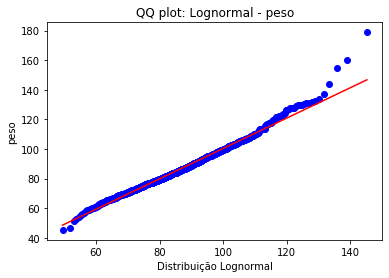

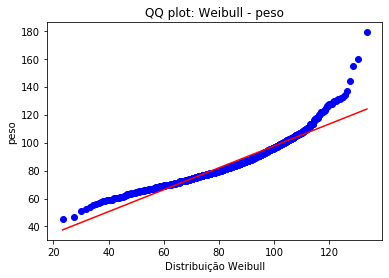

cargaFinal 



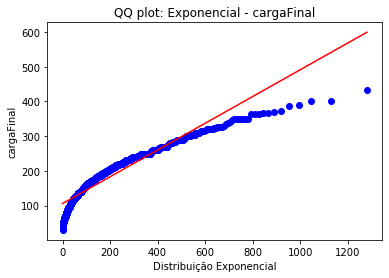

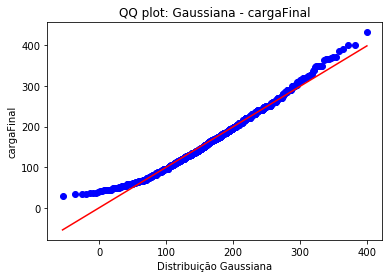

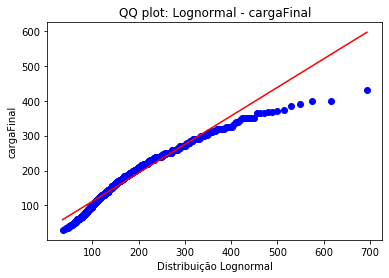

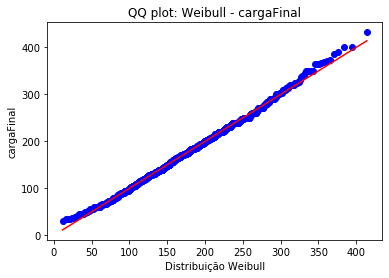

vo2Max 



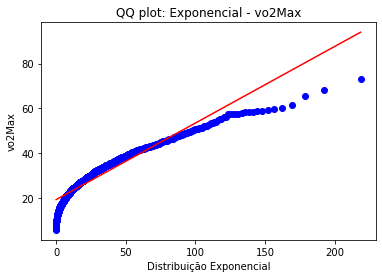

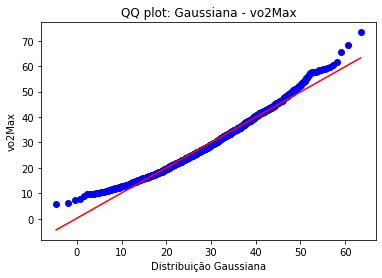

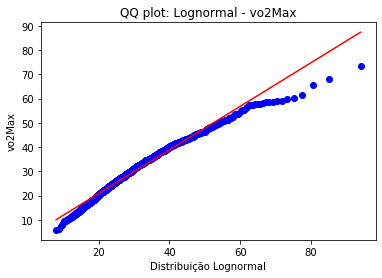

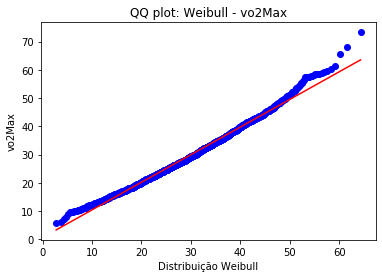

In [9]:
for var in colorMap:
    print(var, "\n")
    
    exp_params = stats.expon.fit(data[var],floc = 0)
    stats.probplot(data[var], dist = 'expon', sparams = exp_params, plot = plt)
    plt.title("QQ plot: Exponencial - " + var)
    plt.ylabel(var)
    plt.xlabel("Distribuição Exponencial")
    plt.savefig(imagesFolder + "qqPlot_exp_" + var)
    plt.show()
    
    norm_params = stats.norm.fit(data[var])
    stats.probplot(data[var], dist = 'norm', sparams = norm_params, plot = plt)
    plt.title("QQ plot: Gaussiana - " + var)
    plt.ylabel(var)
    plt.xlabel("Distribuição Gaussiana")
    plt.savefig(imagesFolder + "qqPlot_gauss_" + var)
    plt.show()
    
    lognorm_params = stats.lognorm.fit(data[var], floc = 0)
    stats.probplot(data[var], dist = 'lognorm', sparams = lognorm_params, plot = plt)
    plt.title("QQ plot: Lognormal - " + var)
    plt.ylabel(var)
    plt.xlabel("Distribuição Lognormal")
    plt.savefig(imagesFolder + "qqPlot_lognorm_" + var)
    plt.show()    
    
    wb_params = stats.weibull_min.fit(data[var], floc = 0)
    stats.probplot(data[var], dist = 'weibull_min', sparams = wb_params, plot = plt)
    plt.title("QQ plot: Weibull - " + var)
    plt.ylabel(var)
    plt.xlabel("Distribuição Weibull")
    plt.savefig(imagesFolder + "qqPlot_weibull_" + var)
    plt.show()

In [10]:
for var in colorMap:
    print("Teste de Hipótese: " + var + "\n")
    
    print("Exponencial:")
    exp_params = stats.expon.fit(data[var], floc = 0)
    ks_exp = stats.kstest(data[var], 'expon', exp_params)
    print("\tD\t=", ks_exp[0])
    print("\tp_value =", ks_exp[1], "\n")
    
    print("Gaussiana")
    norm_params = stats.norm.fit(data[var])
    ks_gauss = stats.kstest(data[var], 'norm', norm_params)    
    print("\tD\t=", ks_gauss[0])
    print("\tp_value =", ks_gauss[1], "\n")
    
    print("Lognormal")
    lognorm_params = stats.lognorm.fit(data[var], floc = 0)
    ks_lognorm = stats.kstest(data[var], 'lognorm', lognorm_params)    
    print("\tD\t=", ks_lognorm[0])
    print("\tp_value =", ks_lognorm[1], "\n")
    
    print("Weibull")
    wb_params = stats.weibull_min.fit(data[var], floc = 0)
    ks_wb = stats.kstest(data[var], 'weibull_min', wb_params)    
    print("\tD\t=", ks_wb[0])
    print("\tp_value =", ks_wb[1], "\n\n\n")

Teste de Hipótese: idade

Exponencial:
	D	= 0.372755615059967
	p_value = 1.1092520093640775e-146 

Gaussiana
	D	= 0.04408368872194113
	p_value = 0.02039175142101984 

Lognormal
	D	= 0.084730460447627
	p_value = 9.073029891408715e-08 

Weibull
	D	= 0.033037815723893305
	p_value = 0.15145170475997996 



Teste de Hipótese: peso

Exponencial:
	D	= 0.4954410013455397
	p_value = 3.358574509201242e-266 

Gaussiana
	D	= 0.06661818817785059
	p_value = 5.75842350736874e-05 

Lognormal
	D	= 0.032285259002662436
	p_value = 0.17003957723540433 

Weibull
	D	= 0.1032173331741221
	p_value = 2.5226220819374233e-11 



Teste de Hipótese: cargaFinal

Exponencial:
	D	= 0.28651634266099946
	p_value = 1.1723966939662301e-85 

Gaussiana
	D	= 0.039233911356943985
	p_value = 0.05277656069132966 

Lognormal
	D	= 0.08035970386976421
	p_value = 4.962162909726044e-07 

Weibull
	D	= 0.02457022560625388
	p_value = 0.47886304960046394 



Teste de Hipótese: vo2Max

Exponencial:
	D	= 0.3348896789424037
	p_value = 1.0

Coeficiente de correlação: idade - vo2Max:	


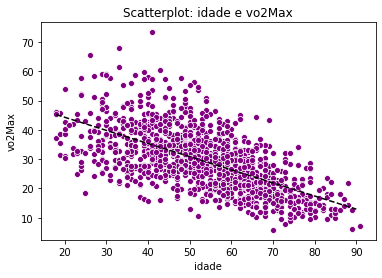

Regressão Linear:  [-0.44852097 53.2968391 ] 


Coeficiente de correlação: peso - vo2Max:	


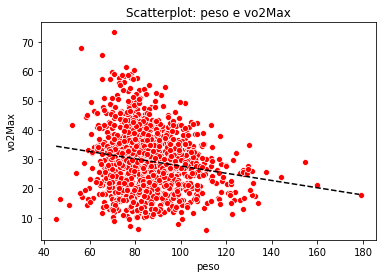

Regressão Linear:  [-0.12370517 40.02419091] 


Coeficiente de correlação: cargaFinal - vo2Max:	


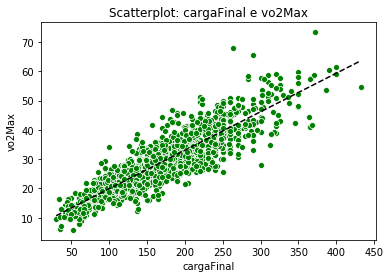

Regressão Linear:  [0.13153934 6.73424783] 




In [11]:
for var in colorMap:
    if var == "vo2Max": continue
    
    r = (np.sum((data[var]) - data[var].mean()) * (data["vo2Max"] - data["vo2Max"].mean()))/(np.sqrt(np.sum((data[var] - data[var].mean()) ** 2)) * np.sqrt(np.sum((data["vo2Max"] - data["vo2Max"].mean())**2)))
    print("Coeficiente de correlação: " + var + " - vo2Max:\t" )
    sns.scatterplot(x = data[var], y = data["vo2Max"], color = colorMap[var])
    
    interval = np.arange(data[var].min(),data[var].max())
    lr = np.polyfit(data[var], data["vo2Max"], 1)
    plt.plot(interval, lr[1] + lr[0] * interval, '--', color = "Black")
    
    plt.title("Scatterplot: " + var + " e vo2Max")
    plt.savefig(imagesFolder + "scatter_" + var + "_vo2Max")
    plt.show()
    
    print("Regressão Linear: ", lr, "\n\n")